### Baseline Flow
1. Import packages
2. Import Data
3. Check Data 
4. Check Target Feature
5. Partition Data into Y and X (Choose Features)
6. Validation Data - Train Test Split
7. Preprocessing (as many steps)
8. Model
9. Make Predictions
10. Evalute metrics
11. Export Predictions

# **1/ Import Packages**

In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/playground-series-s4e4/sample_submission.csv
/kaggle/input/playground-series-s4e4/train.csv
/kaggle/input/playground-series-s4e4/test.csv


# 2/ Import Data


In [15]:
train = pd.read_csv('/kaggle/input/playground-series-s4e4/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e4/test.csv')

# 3/ Check Data

1. 5 rows
2. Check names with data type
3. Descriptive Stats
4. Target Feature

In [16]:
train.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB


In [18]:
test.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,90618,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,90619,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


# 4/ Check Target Feature

<Axes: ylabel='Frequency'>

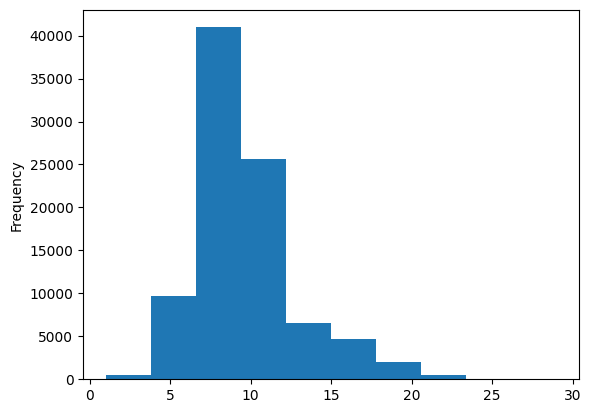

In [19]:
train['Rings'].plot.hist()

In [20]:
train['Rings'].describe()

count    90615.000000
mean         9.696794
std          3.176221
min          1.000000
25%          8.000000
50%          9.000000
75%         11.000000
max         29.000000
Name: Rings, dtype: float64

# 5/ Partition into y and X

In [21]:
selected_features = ['Length','Diameter']

In [22]:
#train
y = train['Rings']
X = train[selected_features]

In [23]:
#test
X_test = test[selected_features]

# 6/ Validation - TTS

In [24]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(72492, 2)
(18123, 2)
(72492,)
(18123,)


# 7/ Preprocessing

* Numerical
* Categorical


## Numerical Transformation
* Convert all to StandardScaler


In [26]:
# 1 - Import Package
# from sklearn.preprocessing import StandardScaler

# 2 - Create an Instance
num_scaler = StandardScaler()

# 3 - Fit an Instance
num_scaler.fit(X_train)

# 4 - Transform
X_train = num_scaler.transform(X_train)
X_val = num_scaler.transform(X_val)
X_test = num_scaler.transform(X_test)

# 8/ Model Building

In [27]:
# 1 - Import Package
from sklearn.linear_model import LinearRegression

# 2 - Create an Instance
model = LinearRegression()

# 3 - Fit an Instance
model.fit(X_train, y_train)

# 4 - Predict/Check
print(model.coef_)
print(model.intercept_)

[-0.96650176  2.97646932]
9.697111405396457


# 9/ Predict

In [28]:
y_train_prediction = model.predict(X_train)
y_val_prediction = model.predict(X_val)
y_test_prediction = model.predict(X_test)

# 10/ Evaluation Metrics
* Rsquared
* RMSE
* MSE

In [29]:
from sklearn.metrics import mean_squared_error

print('train metrics')
print('MSE :', mean_squared_error(y_train, y_train_prediction))
print('RMSE :',mean_squared_error(y_train, y_train_prediction, squared = False))

print('val metrics')
print('MSE :',mean_squared_error(y_val, y_val_prediction))
print('RMSE :',mean_squared_error(y_val, y_val_prediction, squared = False))

train metrics
MSE : 5.943251782942599
RMSE : 2.4378785414664526
val metrics
MSE : 6.107227472623154
RMSE : 2.4712805329673024
